In [34]:
#  Import necessary libraries

from sklearn.svm import SVC   #Support vector classifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
# Load your dataset 
data = load_iris()
X = data.data  # Feature matrix
y = data.target  # Target vector

In [36]:
# Define the parameter values that should be searched

kernel_values=['linear','rbf']

In [37]:
C_values=[0.1,1,10]

In [38]:
#  Create a dictionary of all the parameter options

param_grid={'kernel':
           kernel_values, 'C':
           C_values
           }

In [39]:
# Create a Support vector classifier
svc=SVC()

In [40]:
# Create the grid search object

grid=GridSearchCV(svc,param_grid,cv=5)

In [41]:
# Fit the grid search object to the data

grid.fit(X,y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']})

In [42]:
# Print the best hyperparameters found by the grid search
print("Best hyperparameters:", grid.best_params_)
print("Best cross-validation score:", grid.best_score_)

Best hyperparameters: {'C': 1, 'kernel': 'linear'}
Best cross-validation score: 0.9800000000000001


In [43]:
# Make predictions using the best model
best_model = grid.best_estimator_
y_pred = best_model.predict(X)

In [44]:
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [45]:
# Calculate accuracy
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9933333333333333


In [31]:
# Generate classification report
class_report = classification_report(y, y_pred, target_names=data.target_names)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       1.00      0.98      0.99        50
   virginica       0.98      1.00      0.99        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



In [32]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y, y_pred)

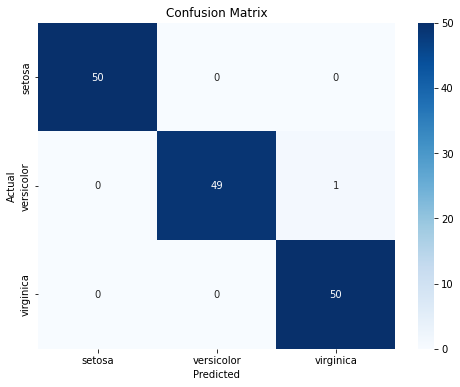

In [33]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [47]:
# Convert the multi-class problem into binary problems
n_classes = len(data.target_names)

In [48]:
# Initialize lists to store results
fpr = []
tpr = []
roc_auc = []
precision = []
recall = []
avg_precision = []


In [51]:
# Compute ROC and precision-recall for each class
for i in range(n_classes):
    y_binary = (y == i).astype(int)
    y_pred_binary = (y_pred == i).astype(int)
    
    # ROC curve
    fpr_i, tpr_i, _ = roc_curve(y_binary, y_pred_binary)
    roc_auc_i = roc_auc_score(y_binary, y_pred_binary)
    
    fpr.append(fpr_i)
    tpr.append(tpr_i)
    roc_auc.append(roc_auc_i)
    
    # Precision-recall curve
    precision_i, recall_i, _ = precision_recall_curve(y_binary, y_pred_binary)
    avg_precision_i = average_precision_score(y_binary, y_pred_binary)
    
    precision.append(precision_i)
    recall.append(recall_i)
    avg_precision.append(avg_precision_i)

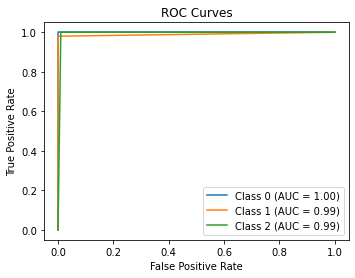

In [52]:
# Plot ROC curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')

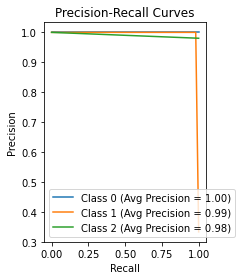

In [54]:
# Plot Precision-Recall curves
plt.subplot(1, 2, 2)
for i in range(n_classes):
    plt.plot(recall[i], precision[i], label=f'Class {i} (Avg Precision = {avg_precision[i]:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

In [62]:
pass

In [63]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3